In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import nltk

In [2]:
review_data = pd.read_csv('Reviews.csv')
review_data.shape

(568454, 10)

#### for Reducing number of data points / Taking samples from the data

In [3]:
review_data = review_data.head(100)
review_data.shape

(100, 10)

In [4]:
review_data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

# Quick EDA

In [5]:
review_data.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,50.500000,1.270000,1.510000,4.260000,1.294130e+09
std,29.011492,2.963942,3.020118,1.260271,5.759573e+07
min,1.000000,0.000000,0.000000,1.000000,1.107821e+09
25%,25.750000,0.000000,0.000000,4.000000,1.281658e+09
50%,50.500000,0.000000,0.500000,5.000000,1.317600e+09
75%,75.250000,1.000000,2.000000,5.000000,1.333951e+09
max,100.000000,19.000000,19.000000,5.000000,1.351210e+09


In [6]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      100 non-null    int64 
 1   ProductId               100 non-null    object
 2   UserId                  100 non-null    object
 3   ProfileName             100 non-null    object
 4   HelpfulnessNumerator    100 non-null    int64 
 5   HelpfulnessDenominator  100 non-null    int64 
 6   Score                   100 non-null    int64 
 7   Time                    100 non-null    int64 
 8   Summary                 100 non-null    object
 9   Text                    100 non-null    object
dtypes: int64(5), object(5)
memory usage: 7.9+ KB


In [7]:
review_data.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

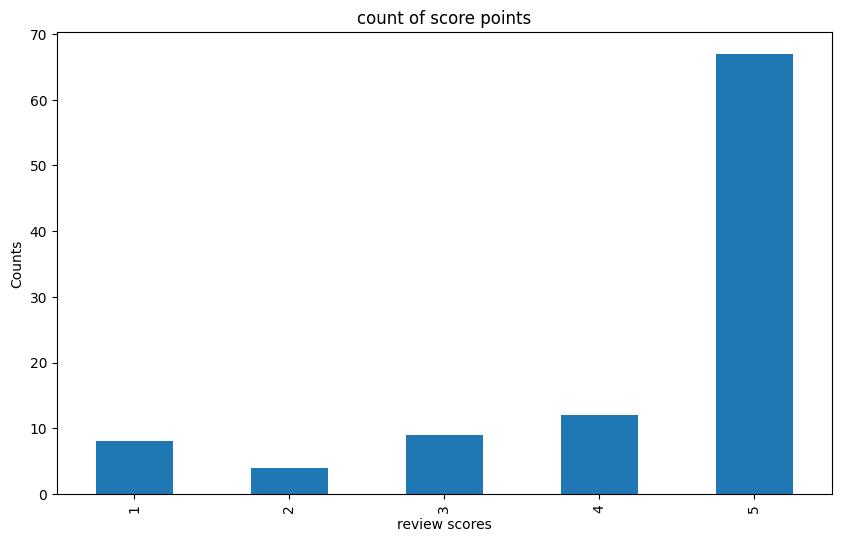

In [8]:
axes = review_data['Score'].value_counts().sort_index()\
    .plot(kind='bar', 
          title='count of score points' , 
          figsize=(10,6))

axes.set_xlabel('review scores')
axes.set_ylabel('Counts')
plt.show()

### Basic NLTK

In [9]:
exmp = review_data['Text'][60]
print(exmp)

Watch your prices with this.  While the assortment was good, and I did get this on a gold box purchase, the price for this was<br />$3-4 less at Target.


In [10]:
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('maxent_ne_chunker')
# nltk.download('words')
# nltk.download('vader_lexicon')

###### tokens = nltk.word_tokenize(exmp)
###### tagged = nltk.pos_tag(tokens)
###### entities = nltk.chunk.ne_chunk(tagged)

In [11]:
tokens = nltk.word_tokenize(exmp)

In [12]:
tagged = nltk.pos_tag(tokens)  ## part of speach
tagged[:10]

[('Watch', 'VB'),
 ('your', 'PRP$'),
 ('prices', 'NNS'),
 ('with', 'IN'),
 ('this', 'DT'),
 ('.', '.'),
 ('While', 'IN'),
 ('the', 'DT'),
 ('assortment', 'NN'),
 ('was', 'VBD')]

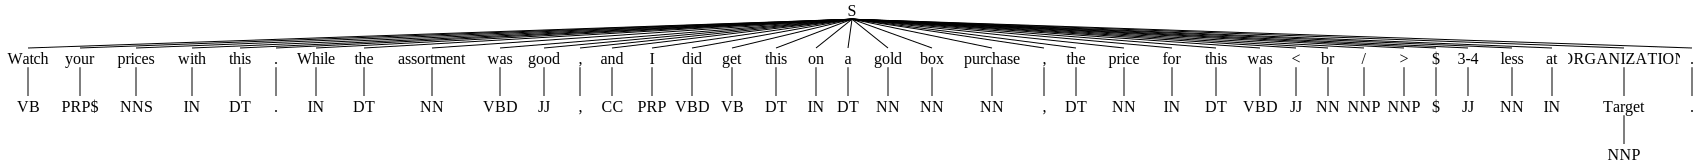

In [13]:
entities = nltk.chunk.ne_chunk(tagged)
entities
# entities.pprint()

#### Step1: VADER Seniment Scoring ---------> Bag of Words approach (Valence Aware Dictionary and Sentiment Reasponer)

In [14]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sid = SentimentIntensityAnalyzer()

##### running Polaruty Score on the all datasets

In [15]:
res = {}
for i,txt in tqdm(review_data.iterrows(),total = len(review_data)):
    text = txt['Text']
    myid = txt['Id']
    res[myid] = sid.polarity_scores(text)

  0%|          | 0/100 [00:00<?, ?it/s]

In [16]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders = vaders.merge(review_data,how='left')

In [17]:
vaders.head()   ## now we have sentimnt score and metadata

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [18]:
import seaborn as snb

<function matplotlib.pyplot.show(close=None, block=None)>

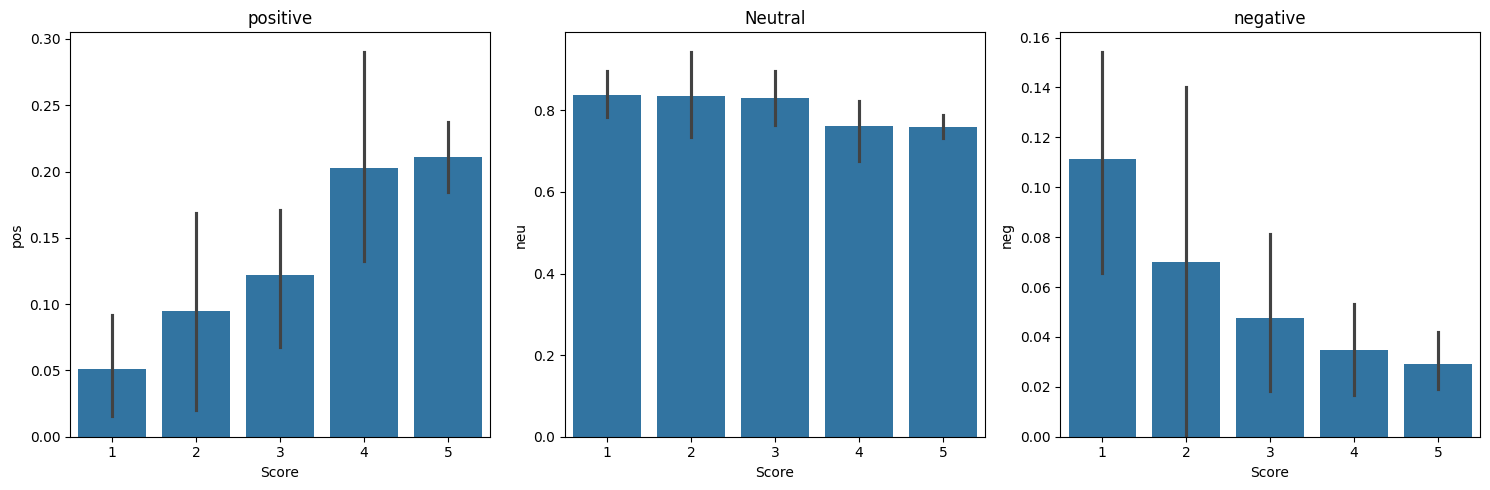

In [19]:
fig, axes = plt.subplots(1,3,figsize = (15,5))
snb.barplot(vaders,x= 'Score',y = 'pos',ax = axes[0])
snb.barplot(vaders,x= 'Score',y = 'neu',ax = axes[1])
snb.barplot(vaders,x= 'Score',y = 'neg',ax = axes[2])
axes[0].set_title('positive')
axes[1].set_title('Neutral')
axes[2].set_title('negative')
plt.tight_layout()
plt.show

#### Step2 - Roberta Pretrained Model

In [20]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

In [21]:
MODEL = f'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [22]:
print(exmp)
sid.polarity_scores(exmp)

Watch your prices with this.  While the assortment was good, and I did get this on a gold box purchase, the price for this was<br />$3-4 less at Target.


{'neg': 0.0, 'neu': 0.9, 'pos': 0.1, 'compound': 0.4404}

In [23]:
# for Roberta-Model
encoded_text = tokenizer(exmp,return_tensors = 'pt')
outcome = model(**encoded_text)
scores = outcome[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
}

print(scores_dict)

{'roberta_neg': 0.014716595, 'roberta_neu': 0.2771517, 'roberta_pos': 0.70813173}


In [24]:

def polarity_scores_roberta(exmp):
    encoded_text = tokenizer(exmp,return_tensors = 'pt')
    outcome = model(**encoded_text)
    scores = outcome[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }
    return scores_dict



res = {}
for i , txt in tqdm(review_data.iterrows(),total = len(review_data)):
    try: 
        text = txt['Text']
        myid = txt['Id']
        roberto_res = polarity_scores_roberta(text)
        res[myid] = roberto_res
    except RuntimeError:
        print('fails at id {}'.format(myid))

  0%|          | 0/100 [00:00<?, ?it/s]

fails at id 83


In [25]:
roberta = pd.DataFrame(res).T
roberta = roberta.reset_index().rename(columns={'index':'Id'})
roberta = roberta.merge(vaders,how='left')

In [26]:
roberta

,Id,roberta_neg,roberta_neu,roberta_pos,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.009624,0.049980,0.940395,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.508986,0.452413,0.038600,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.003229,0.098067,0.898704,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.002295,0.090219,0.907486,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.001635,0.010302,0.988063,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,96,0.007117,0.061205,0.931678,0.031,0.732,0.237,0.9273,B0019CW0HE,A1BFNM27629VAV,E. Triebe,0,0,5,1320105600,Good healthy dog food,I've been very pleased with the Natural Balanc...
95,97,0.003077,0.036150,0.960772,0.000,0.818,0.182,0.9820,B0019CW0HE,A18AAABCIJKC5Q,Rhiever,0,0,5,1303776000,Great dog food,My 1-1/2 year old basenji/jack russell mix lov...
96,98,0.156117,0.307076,0.536807,0.053,0.793,0.154,0.7729,B0019CW0HE,A3UII2114114PI,"FuNky Faja ""SiLkk""",0,0,5,1297296000,"Great allergy sensitive dog food, dogs love it",Our pup has experienced allergies in forms of ...
97,99,0.092719,0.597661,0.309620,0.024,0.910,0.066,0.5106,B0019CW0HE,ABZ9F0D94YK45,Amazon-tron 3000,0,0,5,1295308800,Perfect for our English Bulldog with Allergies,My English Bulldog had skin allergies the summ...


### Comapre Scores Between Models

In [27]:
roberta.columns

Index(['Id', 'roberta_neg', 'roberta_neu', 'roberta_pos', 'neg', 'neu', 'pos',
       'compound', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'Summary', 'Text'],
      dtype='object')

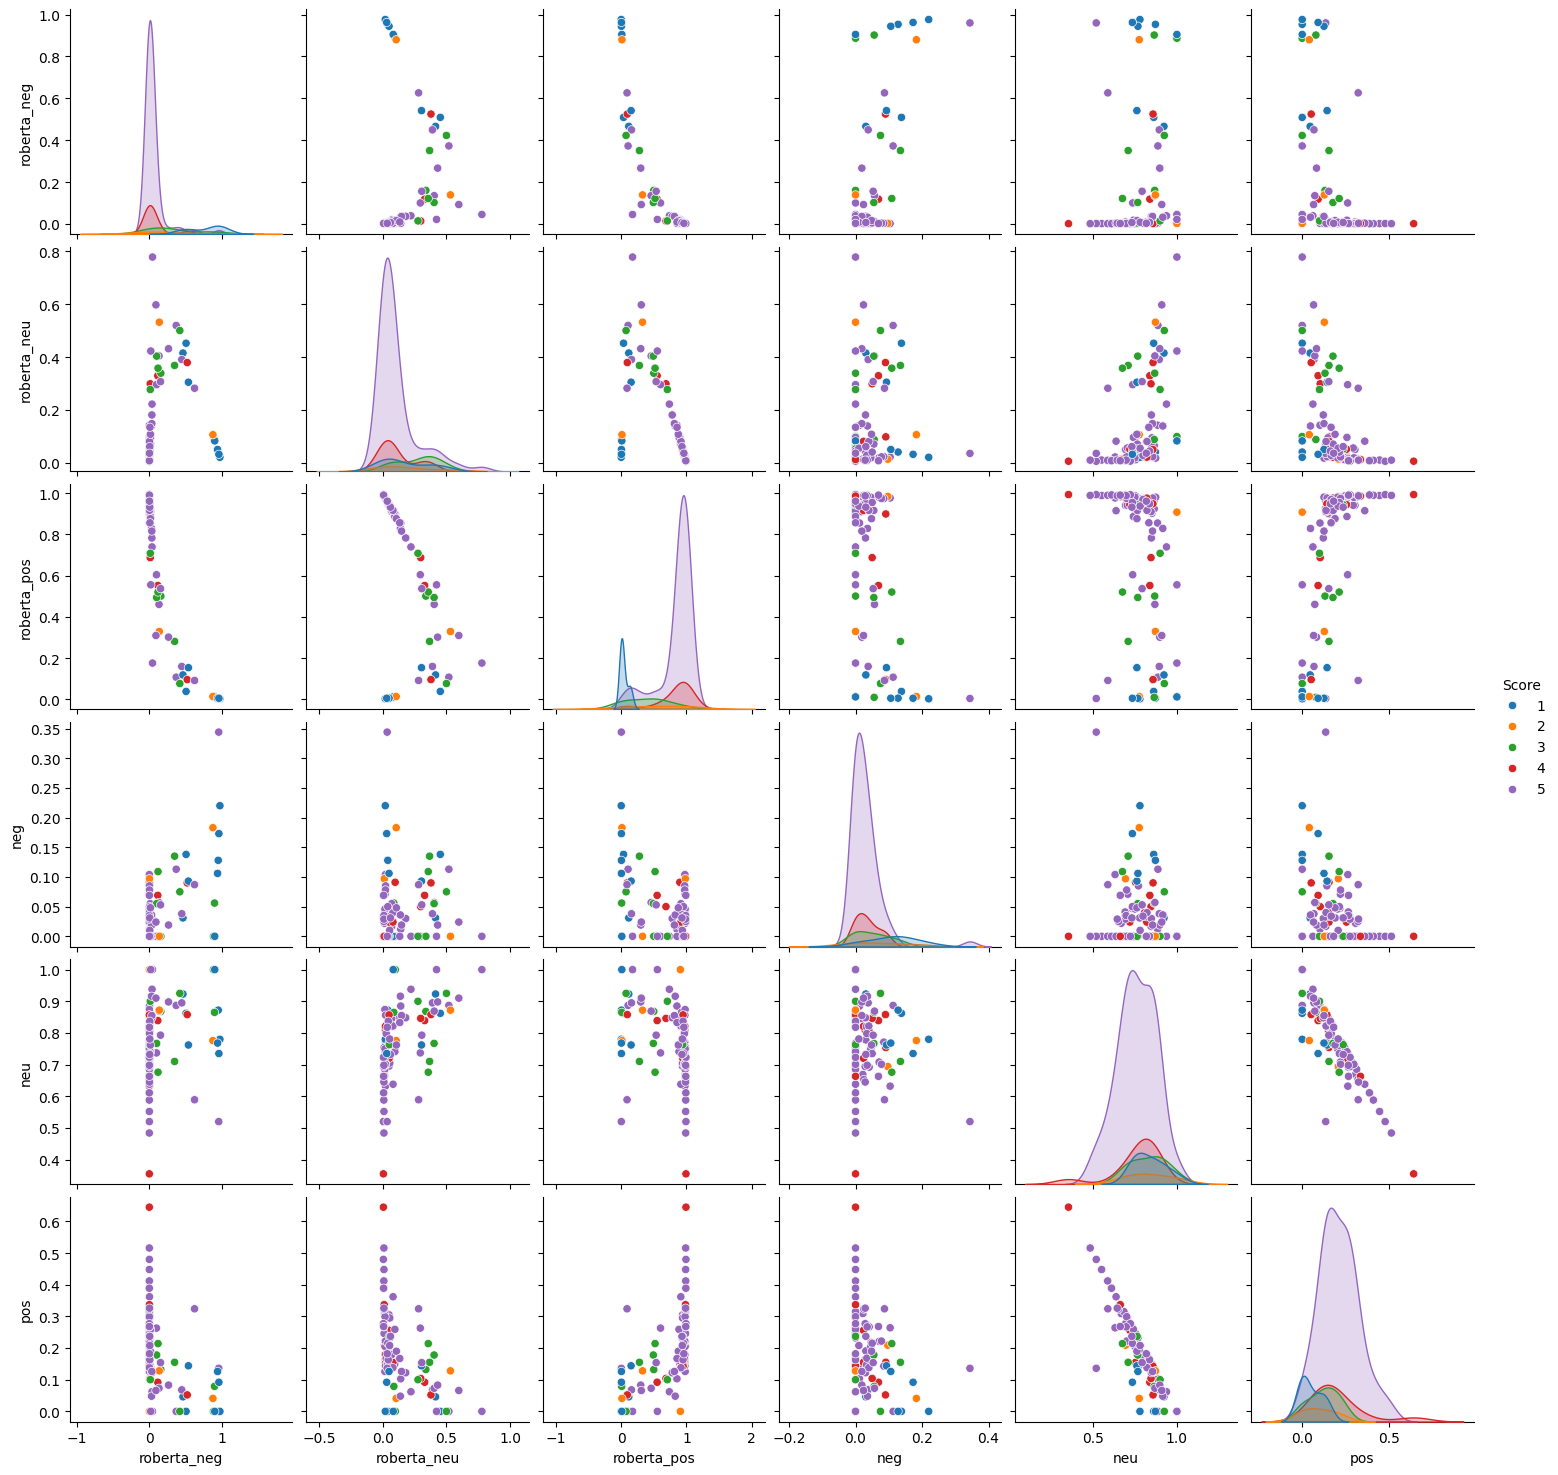

In [28]:
snb.pairplot(data= roberta,
             vars = ['roberta_neg', 'roberta_neu', 'roberta_pos', 'neg', 'neu', 'pos'],
             hue='Score',
             palette='tab10')
plt.show()

Roberto model provide more information on reviewa 

#### Step3 Review examples

##### Positive sentiment score 1

In [29]:
roberta.query('Score == 1') \
    .sort_values('roberta_pos',ascending=False)['Text'].values[0]

'Buyer Beware Please! This sweetener is not for everybody.  Maltitol is an alcohol sugar and can be undigestible in the body.  You will know a short time after consuming it if you are one of the unsuspecting many who cannot digest it by the extreme intestinal bloating and cramping and massive amounts of gas a person can experience. Nausea, diarrhea & headaches can also be experienced. I learned my lesson the hard way years ago when I fell in love with the sugar-free chocolates suzanne sommers used to sell.  I thought I\'d found sugar-free chocolate nirvana at first taste but the bliss was short lived when the terrible side effects of maltitol kicked in.  The discomfort was unlike anything I had ever felt before.  I blew up like a balloon and had very painful abdominal cramping.  As the symptoms passed, this too was very unpleasant.  Though hard for me to believe a low calorie sweetener could be the culprit, all symptoms were gone when I stopped eating the chocolate. My hunch it had som

In [30]:
roberta.query('Score == 1') \
    .sort_values('pos',ascending=False)['Text'].values[0]

'Buyer Beware Please! This sweetener is not for everybody.  Maltitol is an alcohol sugar and can be undigestible in the body.  You will know a short time after consuming it if you are one of the unsuspecting many who cannot digest it by the extreme intestinal bloating and cramping and massive amounts of gas a person can experience. Nausea, diarrhea & headaches can also be experienced. I learned my lesson the hard way years ago when I fell in love with the sugar-free chocolates suzanne sommers used to sell.  I thought I\'d found sugar-free chocolate nirvana at first taste but the bliss was short lived when the terrible side effects of maltitol kicked in.  The discomfort was unlike anything I had ever felt before.  I blew up like a balloon and had very painful abdominal cramping.  As the symptoms passed, this too was very unpleasant.  Though hard for me to believe a low calorie sweetener could be the culprit, all symptoms were gone when I stopped eating the chocolate. My hunch it had som

##### Negative sentiment Score 5

In [31]:
roberta.query('Score == 5') \
    .sort_values('roberta_neg',ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [32]:
roberta.query('Score == 5') \
    .sort_values('neg',ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

### The Transformers pipline

In [33]:
from transformers import pipeline

sent_pipline = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [34]:
sent_pipline('winn!!!!')

[{'label': 'POSITIVE', 'score': 0.9996050000190735}]

## This the the shortst way to get sentiment analysis esaily